# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#data preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action="ignore")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
#Load the data set
df=pd.read_csv(r"C:/Users/Thara/Downloads/Delivery_Starter/porter_data_1.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [4]:
df.shape

(175777, 14)

In [5]:
df.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,35.887949,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,21.843090
std,1.330963,20.728254,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,8.748712
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,18.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,15.360000
50%,2.000000,38.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,21.760000
75%,4.000000,55.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,28.120000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,83.520000


In [6]:
#checking null values
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [7]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
datetime_columns = ['created_at','actual_delivery_time']
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # coerce to handle invalid formats

# Check result
print(df[datetime_columns].dtypes)


created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [9]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [10]:
# Convert categorical features to category type
categorical_columns = ['market_id','store_primary_category','order_protocol']

for col in categorical_columns:
    df[col]=df[col].astype('category')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [12]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.seconds/60

In [13]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time_minutes
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0


In [14]:
df.select_dtypes(include=['object', 'bool', 'category']).describe().T

,count,unique,top,freq
market_id,175777.0,6.0,2.0,53469.0
store_primary_category,175777.0,73.0,4.0,18183.0
order_protocol,175777.0,7.0,1.0,48404.0


In [15]:
df.select_dtypes(include=['number']).describe(percentiles=(0.01, 0.05, .25, .5, .75, 0.9, 0.95, 0.99)).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
total_items,175777.0,3.204976,2.674055,1.0,1.00,1.00,2.00,3.00,4.00,6.00,7.00,12.00,411.00
subtotal,175777.0,2697.111147,1828.554893,0.0,537.00,805.00,1412.00,2224.00,3410.00,4970.00,6250.00,9460.00,26800.00
num_distinct_items,175777.0,2.675060,1.625681,1.0,1.00,1.00,1.00,2.00,3.00,5.00,6.00,8.00,20.00
min_item_price,175777.0,684.965433,519.882924,-86.0,0.00,125.00,299.00,595.00,942.00,1295.00,1580.00,2500.00,14700.00
max_item_price,175777.0,1160.158616,560.828571,0.0,259.00,440.00,799.00,1095.00,1395.00,1795.00,2100.00,3100.00,14700.00
total_onshift_dashers,175777.0,44.918664,34.544724,-4.0,0.00,4.00,17.00,37.00,66.00,98.00,115.00,136.00,171.00
total_busy_dashers,175777.0,41.861381,32.168505,-5.0,0.00,3.00,15.00,35.00,63.00,90.00,105.00,126.00,154.00
total_outstanding_orders,175777.0,58.230115,52.731043,-6.0,0.00,3.00,17.00,41.00,85.00,140.00,169.00,213.00,285.00
distance,175777.0,21.843090,8.748712,0.0,4.44,7.72,15.36,21.76,28.12,33.32,36.32,41.84,83.52
delivery_time_minutes,175777.0,46.203013,9.327424,32.0,32.00,33.00,39.00,45.00,52.00,59.00,63.00,71.00,110.00


In [16]:
for column in df.select_dtypes(include=['object', 'bool', 'category']).columns:
    print(df[column].value_counts(normalize=True, dropna=False) * 100)
    print("*" * 70, '\n')

market_id
2.0    30.418655
4.0    26.295818
1.0    21.114822
3.0    11.989623
5.0     9.818122
6.0     0.362960
Name: proportion, dtype: float64
********************************************************************** 

store_primary_category
4     10.344357
55     8.957372
46     8.866917
13     5.640670
58     5.117279
        ...    
1      0.005689
43     0.005120
8      0.001138
3      0.000569
21     0.000569
Name: proportion, Length: 73, dtype: float64
********************************************************************** 

order_protocol
1.0    27.537164
3.0    26.809537
5.0    23.561103
2.0    11.884376
4.0     9.811295
6.0     0.385716
7.0     0.010809
Name: proportion, dtype: float64
********************************************************************** 



In [17]:
# Negative values
numeric_cols = df.select_dtypes(include=[np.number]).columns
columns_with_negatives = df[numeric_cols].columns[(df[numeric_cols] < 0).any()]
neg_sum = (df[columns_with_negatives] < 0).sum()
neg_pct = (df[columns_with_negatives] < 0).mean() * 100

pd.DataFrame({'Count': neg_sum,'Percentage (%)': neg_pct})

,Count,Percentage (%)
min_item_price,12,0.006827
total_onshift_dashers,21,0.011947
total_busy_dashers,21,0.011947
total_outstanding_orders,41,0.023325


In [18]:
# Dropping the negative values as it's might impact the study
neg_rw = (df[numeric_cols]< 0).any(axis=1)
porter_data = df.loc[~neg_rw]

df.shape

(175777, 15)

In [19]:
df.describe().round(3).T

,count,mean,min,25%,50%,75%,max,std
created_at,175777,2015-02-04 19:57:50.009631744,2015-01-21 15:22:03,2015-01-29 01:31:19,2015-02-05 02:41:26,2015-02-12 01:04:32,2015-02-18 06:00:44,NaN
actual_delivery_time,175777,2015-02-04 20:44:02.190406144,2015-01-21 16:07:03,2015-01-29 02:16:30,2015-02-05 03:34:33,2015-02-12 01:48:24,2015-02-18 06:51:10,NaN
total_items,175777.0,3.205,1.0,2.0,3.0,4.0,411.0,2.674
subtotal,175777.0,2697.111,0.0,1412.0,2224.0,3410.0,26800.0,1828.555
num_distinct_items,175777.0,2.675,1.0,1.0,2.0,3.0,20.0,1.626
min_item_price,175777.0,684.965,-86.0,299.0,595.0,942.0,14700.0,519.883
max_item_price,175777.0,1160.159,0.0,799.0,1095.0,1395.0,14700.0,560.829
total_onshift_dashers,175777.0,44.919,-4.0,17.0,37.0,66.0,171.0,34.545
total_busy_dashers,175777.0,41.861,-5.0,15.0,35.0,63.0,154.0,32.169
total_outstanding_orders,175777.0,58.23,-6.0,17.0,41.0,85.0,285.0,52.731


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [20]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = df['created_at'].dt.hour
df['is_weekend'] = df['created_at'].dt.dayofweek.apply(lambda x: 0 if x < 5 else 1)
df['day_of_week'] = df['created_at'].dt.dayofweek 
# Create a categorical feature 'isWeekend'

df['is_weekend'] = df['is_weekend'].astype('category')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time_minutes,created_hour,is_weekend,day_of_week
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,0,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,0,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,0,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,0,1


In [21]:
# Drop unnecessary columns
df = df.drop(columns=['created_at', 'actual_delivery_time', 'store_primary_category'])
df.head()


,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time_minutes,created_hour,is_weekend,day_of_week
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,0,4
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,0,1
2,2.0,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,0,3
4,1.0,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,0,1


In [22]:
df.isnull().sum()

market_id                   0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
delivery_time_minutes       0
created_hour                0
is_weekend                  0
day_of_week                 0
dtype: int64

In [23]:
df.shape

(175777, 15)

In [24]:
df = df.drop_duplicates()
df.shape

(175762, 15)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [25]:
# Define target variable (y) and features (X)
X = df.drop(columns=['delivery_time_minutes'])
y = df['delivery_time_minutes']

X.head()


,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,is_weekend,day_of_week
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,22,0,4
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,21,0,1
2,2.0,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,0,0,0
3,1.0,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,3,0,3
4,1.0,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,2,0,1


In [26]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: delivery_time_minutes, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [27]:
# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140609, 14)
(35153, 14)
(140609,)
(35153,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [28]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Printing outputs
print("Numerical Variables:")
print(numerical_columns)

print("\nCategorical Variables:")
print(categorical_columns)

Numerical Variables:
['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'created_hour', 'day_of_week']

Categorical Variables:
['market_id', 'order_protocol', 'is_weekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

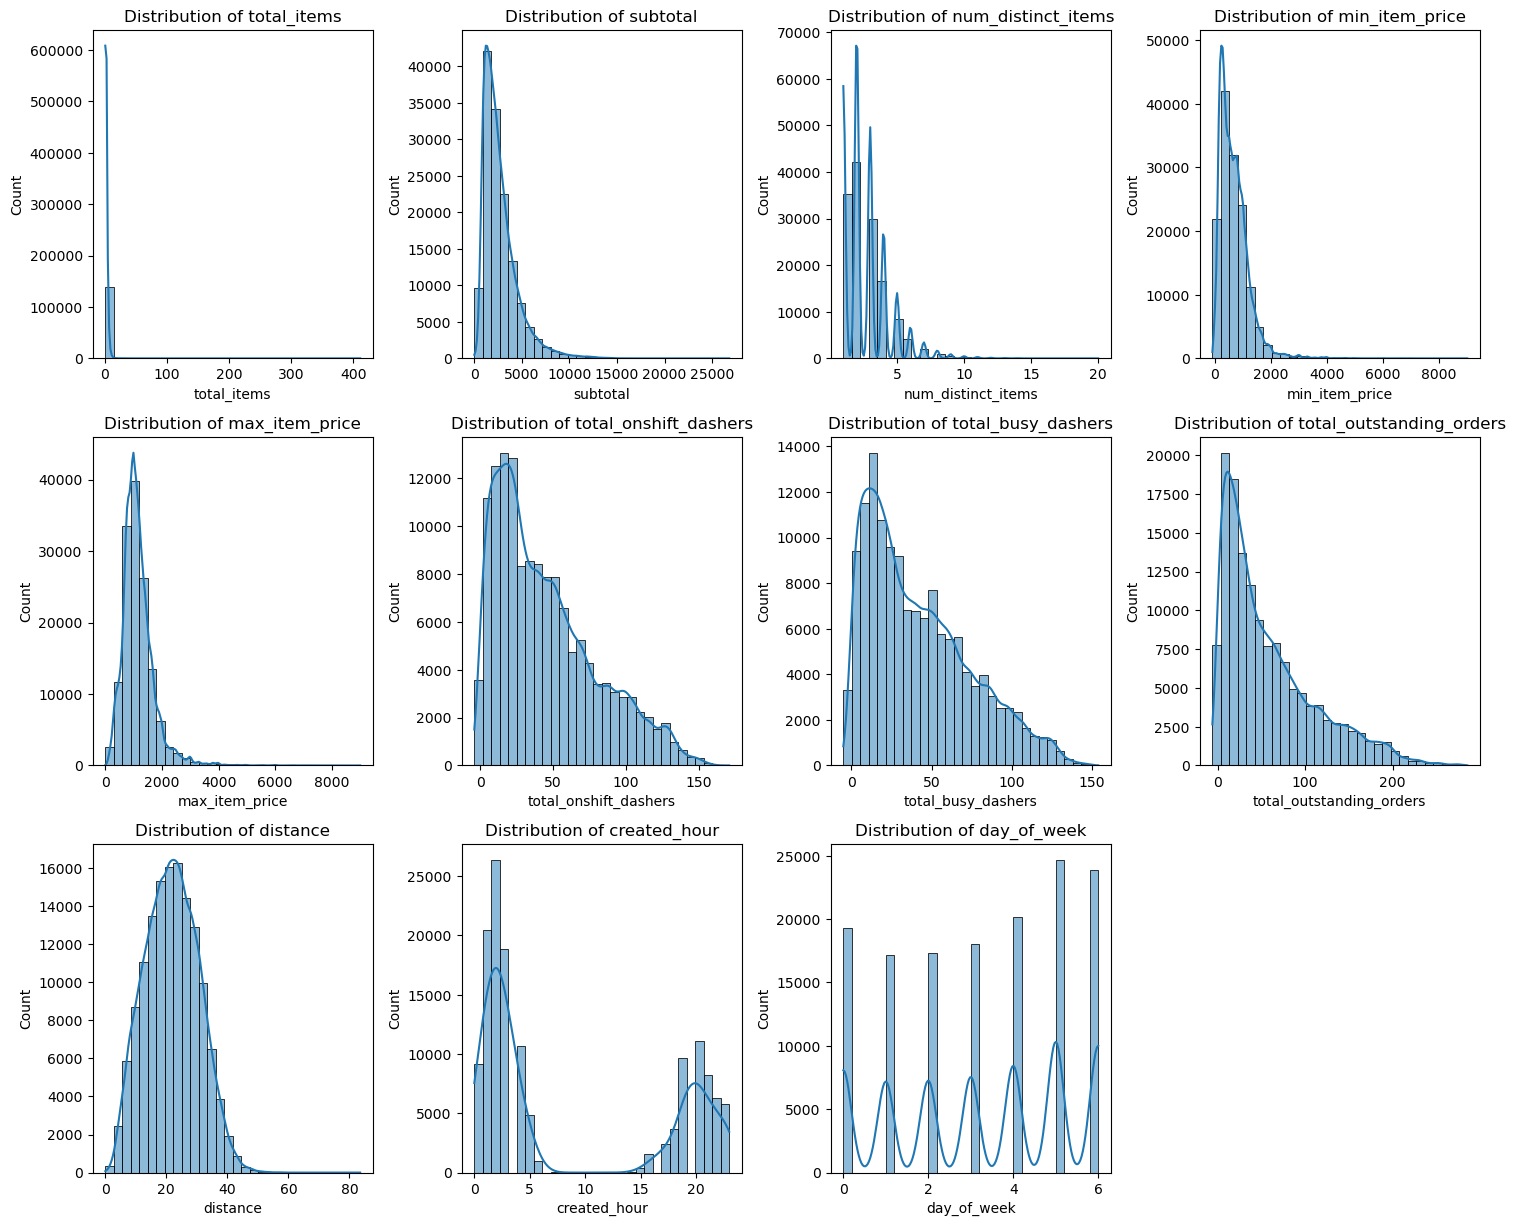

In [29]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 16))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

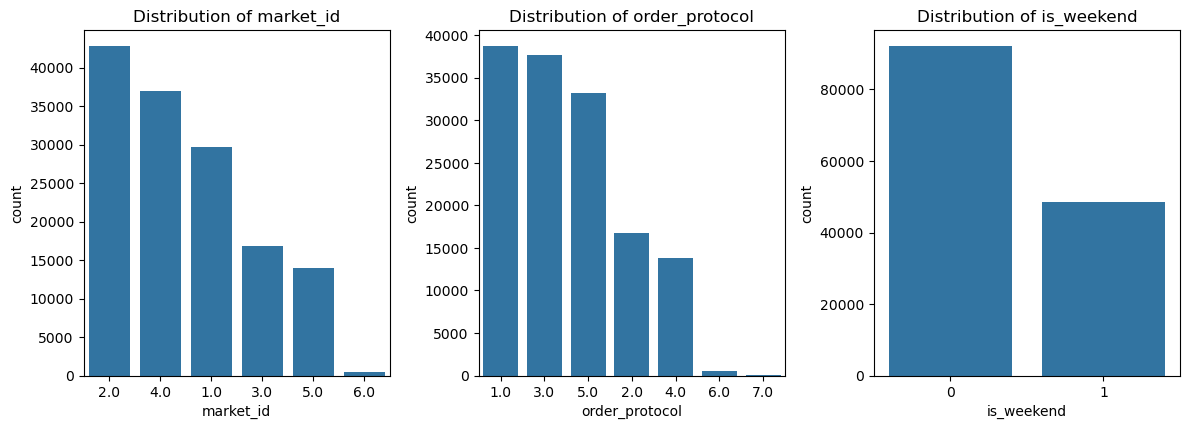

In [30]:
# Distribution of categorical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=X_train[col], order=X_train[col].value_counts().index,)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

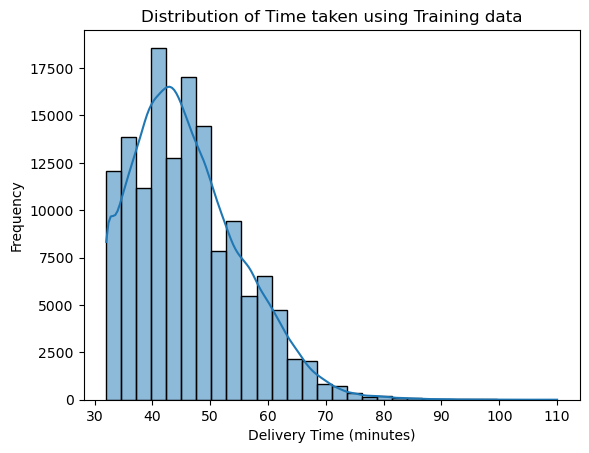

In [31]:
# Distribution of time_taken
sns.histplot(y_train, bins=30, kde=True)

plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Time taken using Training data")

plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

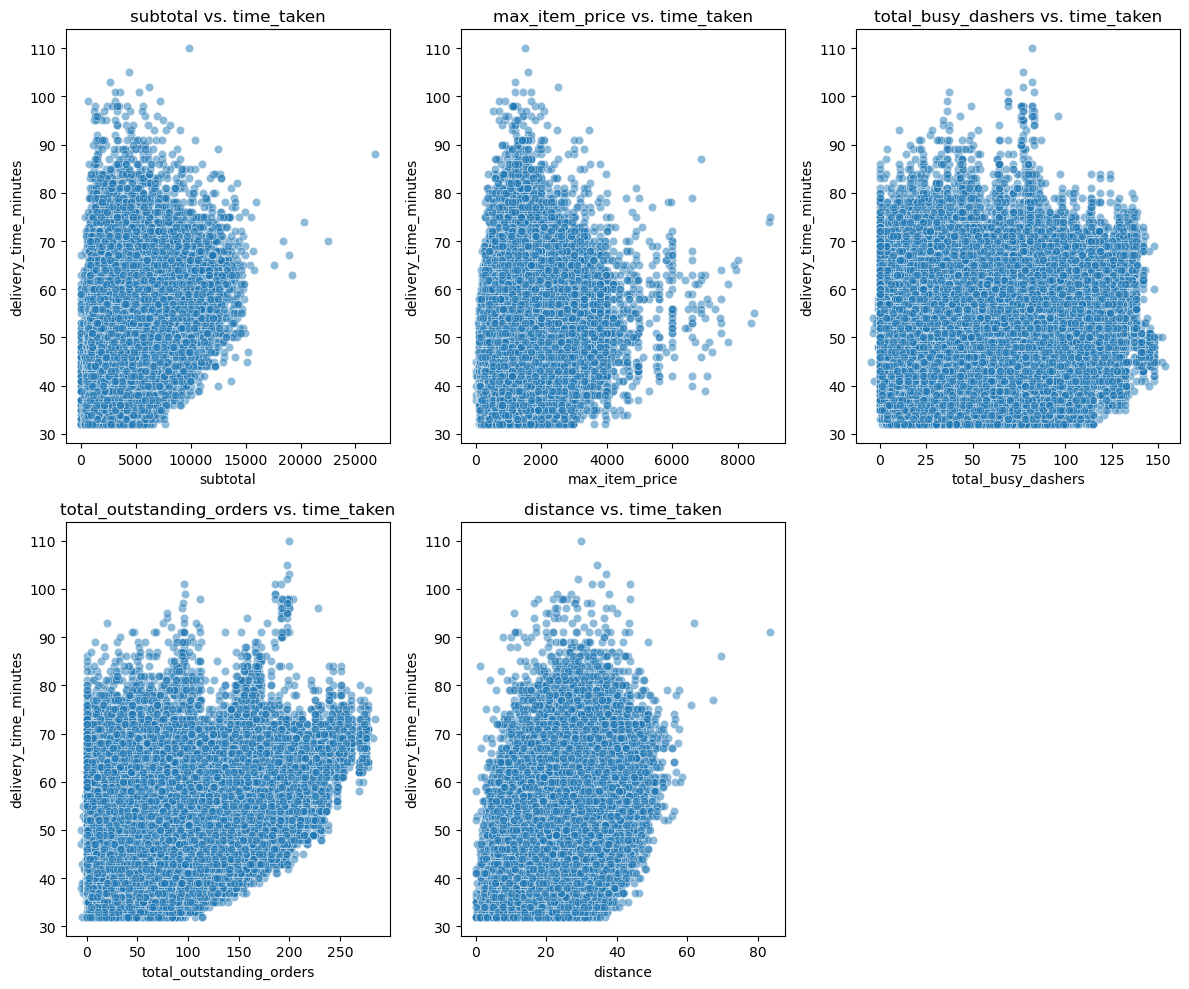

In [32]:
# Scatter plot to visualise the relationship between time_taken and other features
important_features = ['subtotal', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(important_features):
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{col} vs. time_taken')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


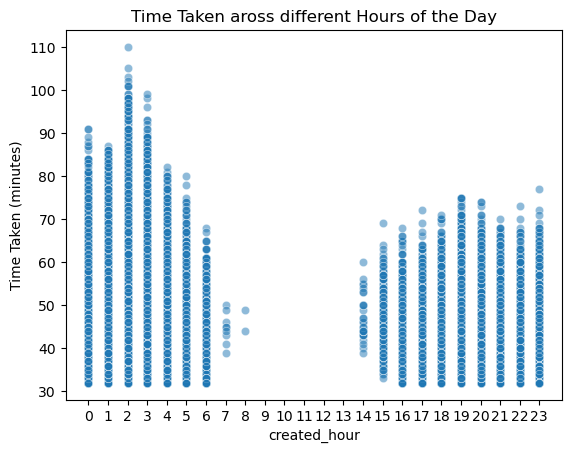

In [33]:
# Show the distribution of time_taken for different hours
sns.scatterplot(x=X_train['created_hour'], y=y_train, alpha=0.5)
plt.xlabel("created_hour")
plt.ylabel("Time Taken (minutes)")
plt.title("Time Taken aross different Hours of the Day")
plt.xticks(range(0, 24))
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

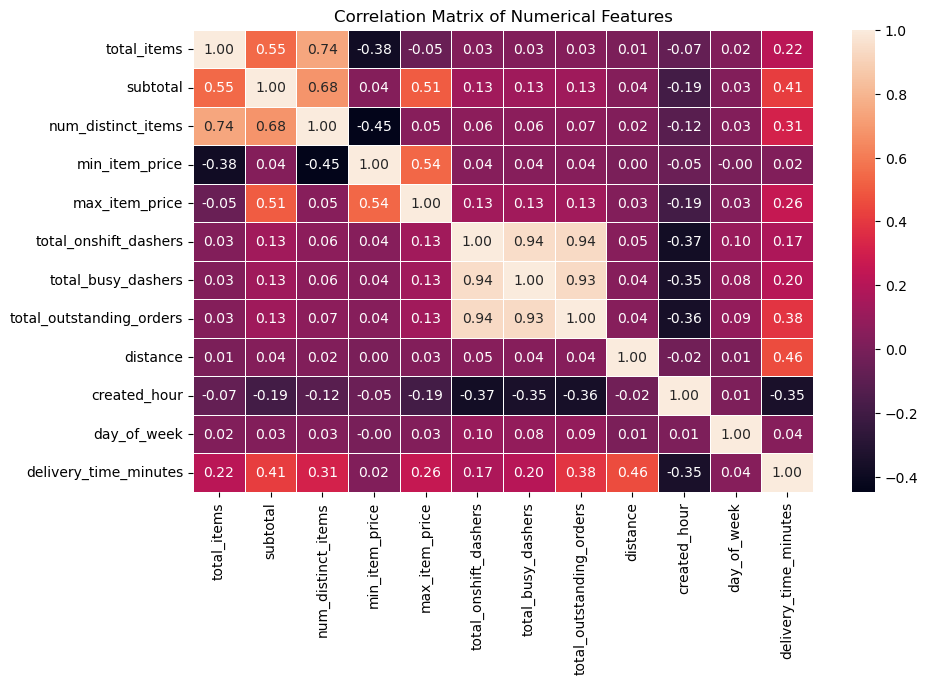

In [34]:
# Plot the heatmap of the correlation matrix
corr_matrix = X_train[numerical_columns].join(y_train).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [35]:
# Drop 3-5 weakly correlated columns from training dataset
correlations = X_train[numerical_columns].corrwith(y_train)
threshold = 0.1
weak_features = correlations[abs(correlations) < threshold].index.tolist()
weak_features


['min_item_price', 'day_of_week']

In [36]:
# Drop weakly correlated features from X_train and X_test
X_train = X_train.drop(columns=weak_features)
X_train

,market_id,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,is_weekend
29429,4.0,2.0,4,3590,3,1195,96.0,94.0,152.0,20.68,1,0
141821,1.0,5.0,3,3184,3,968,21.0,16.0,13.0,17.72,3,0
32757,4.0,1.0,5,6545,5,1499,50.0,42.0,78.0,18.28,1,0
46717,1.0,1.0,4,4700,4,1600,5.0,5.0,7.0,13.32,2,0
42092,3.0,2.0,6,5925,2,1095,46.0,46.0,46.0,10.60,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119887,2.0,5.0,2,1149,2,999,29.0,39.0,42.0,23.20,20,0
103702,2.0,1.0,1,1095,1,1095,89.0,111.0,112.0,18.64,2,0
131941,3.0,5.0,1,590,1,590,6.0,4.0,4.0,7.76,16,0
146878,2.0,5.0,1,895,1,895,64.0,60.0,64.0,30.68,23,1


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

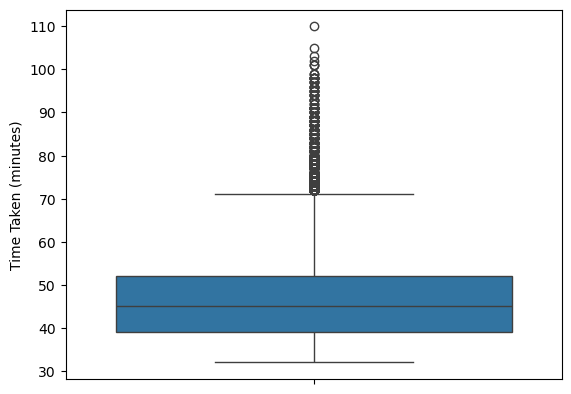

In [37]:
# Boxplot for time_taken
sns.boxplot(y=y_train)
plt.ylabel("Time Taken (minutes)")

plt.show()


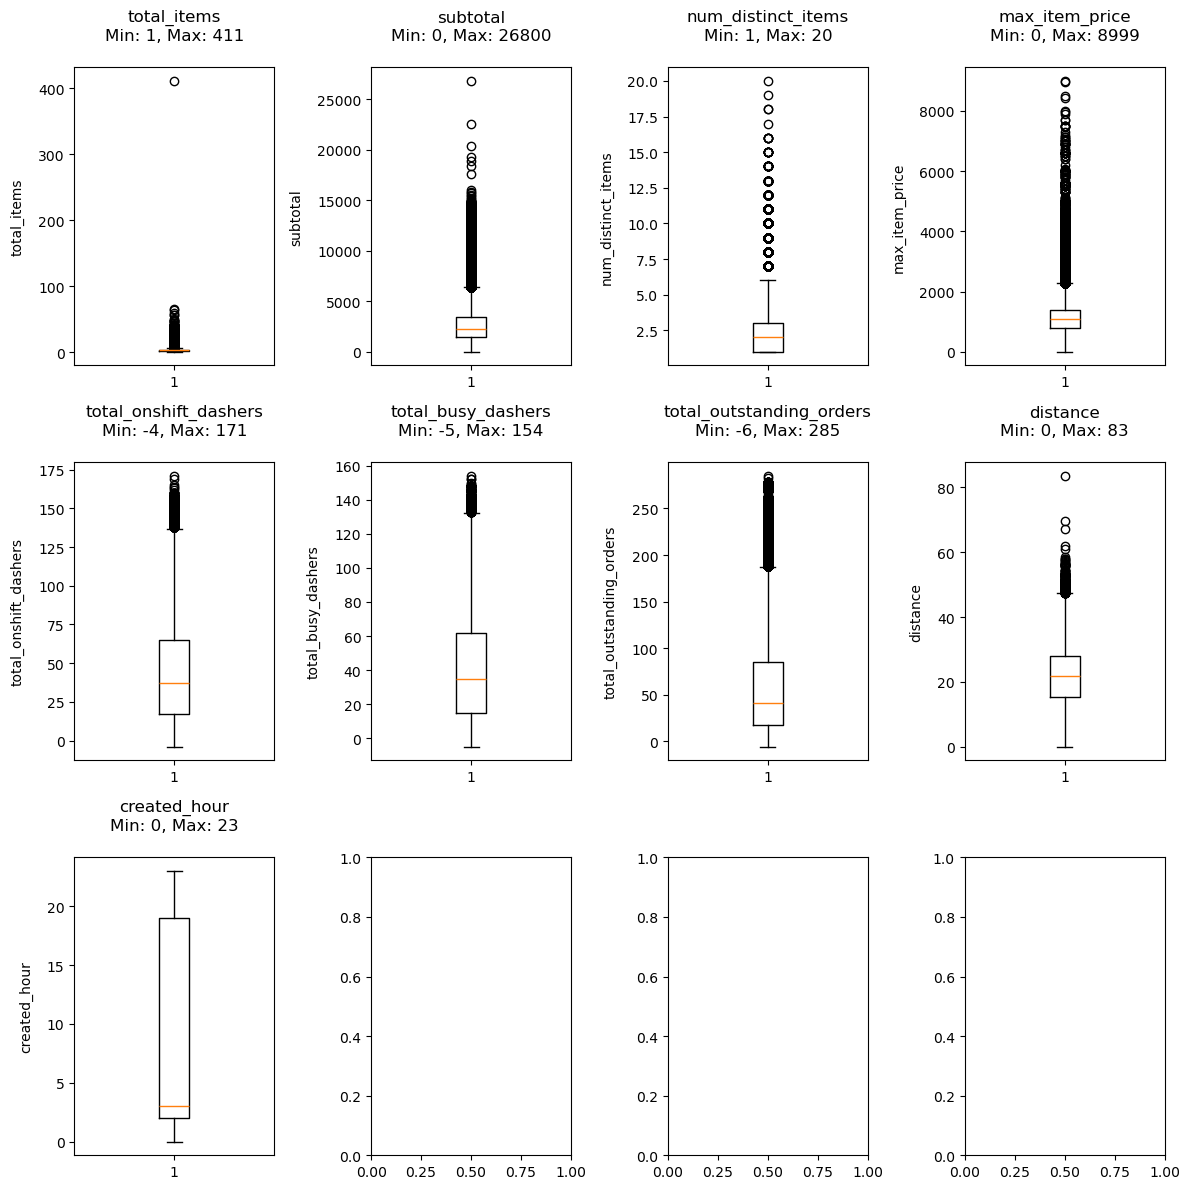

In [38]:
# Boxplots for numerical features
numerical_columns = X_train.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    
    min_val = int(X_train[column].min())
    max_val = int(X_train[column].max())
    
    axes[i].boxplot(X_train[column])
    
    axes[i].set_title(f'{column}\nMin: {min_val}, Max: {max_val}', pad=20)
    axes[i].set_ylabel(column, labelpad=10)
    
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [39]:
# Handle outliers
def capping_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # caping the lower bound and upper bound
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df


In [40]:
# 'num_distinct_items' as represents unique item counts in an order, so high values are valid
capping_columns = [col for col in numerical_columns if col != "num_distinct_items"]
X_train = capping_outliers(X_train, capping_columns)

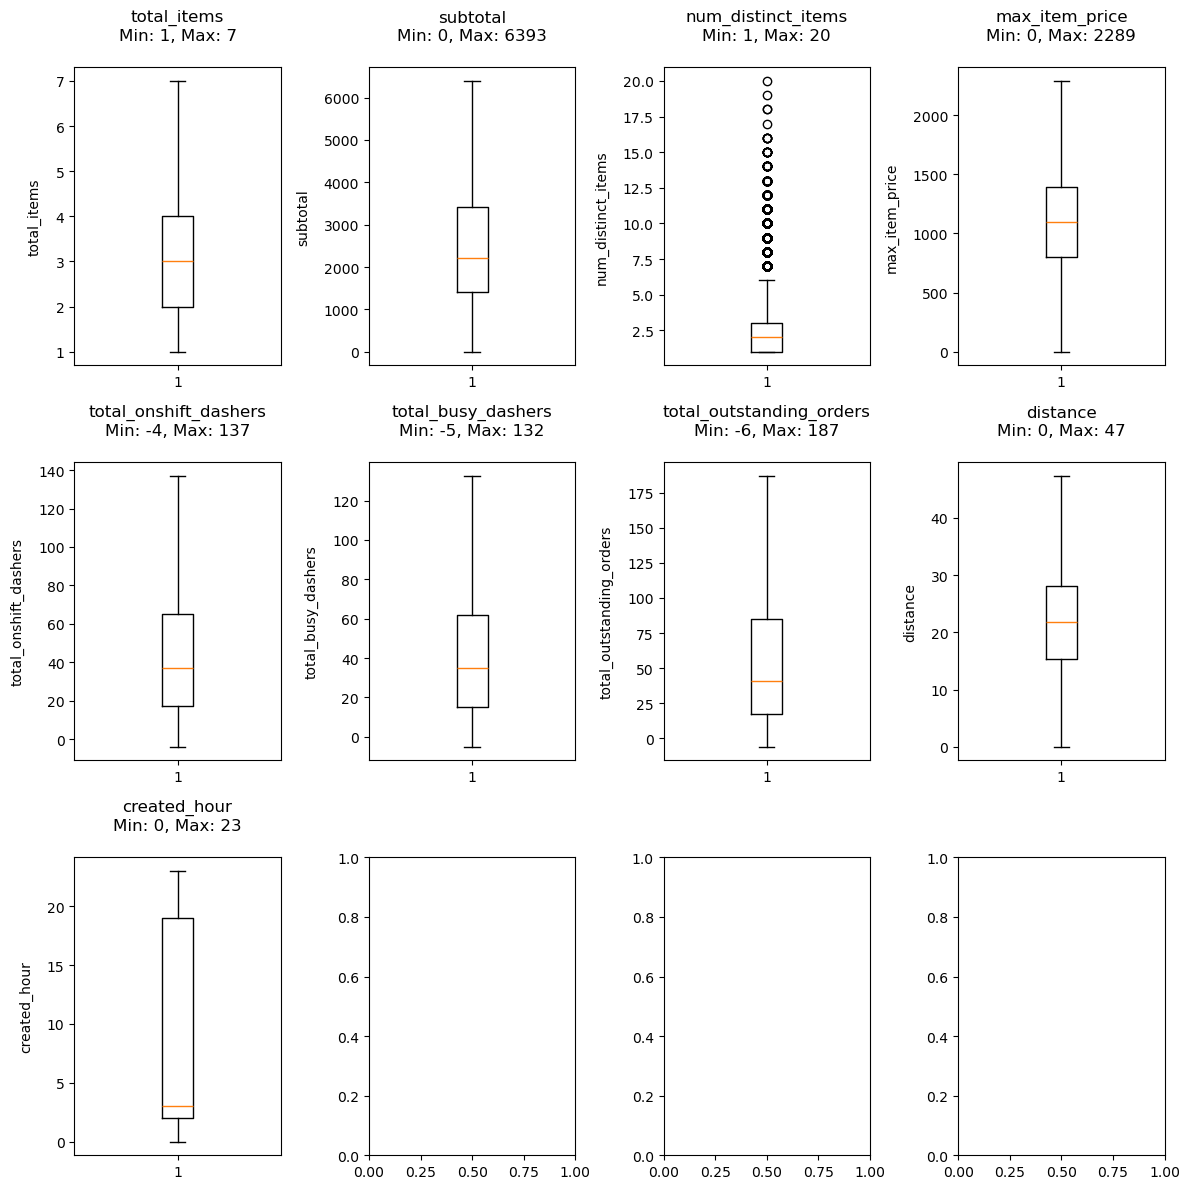

In [41]:
# Checking the distribution after the capping
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    
    min_val = int(X_train[column].min())
    max_val = int(X_train[column].max())
    
    axes[i].boxplot(X_train[column])
    
    axes[i].set_title(f'{column}\nMin: {min_val}, Max: {max_val}', pad=20)
    axes[i].set_ylabel(column, labelpad=10)

plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [42]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X_test.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X_test.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Printing outputs
print("Numerical Variables:")
print(numerical_columns)

print("\nCategorical Variables:")
print(categorical_columns)

Numerical Variables:
['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'created_hour', 'day_of_week']

Categorical Variables:
['market_id', 'order_protocol', 'is_weekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

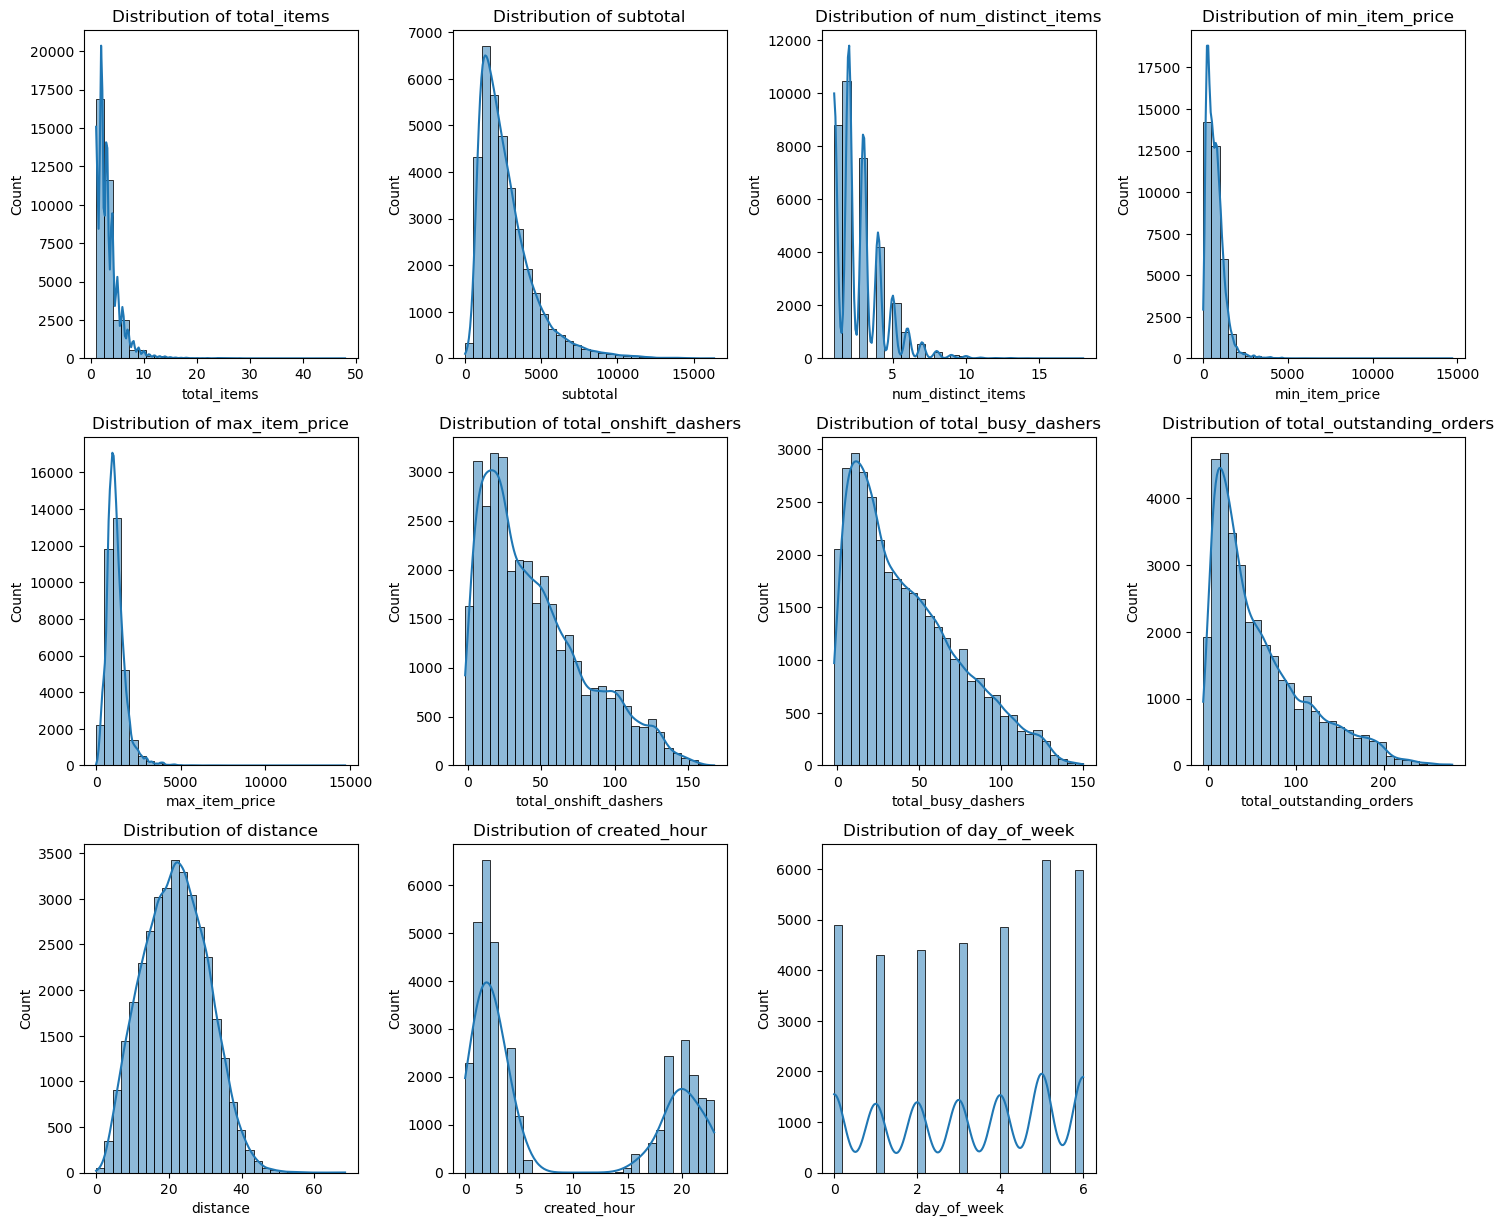

In [43]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 16))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(X_test[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

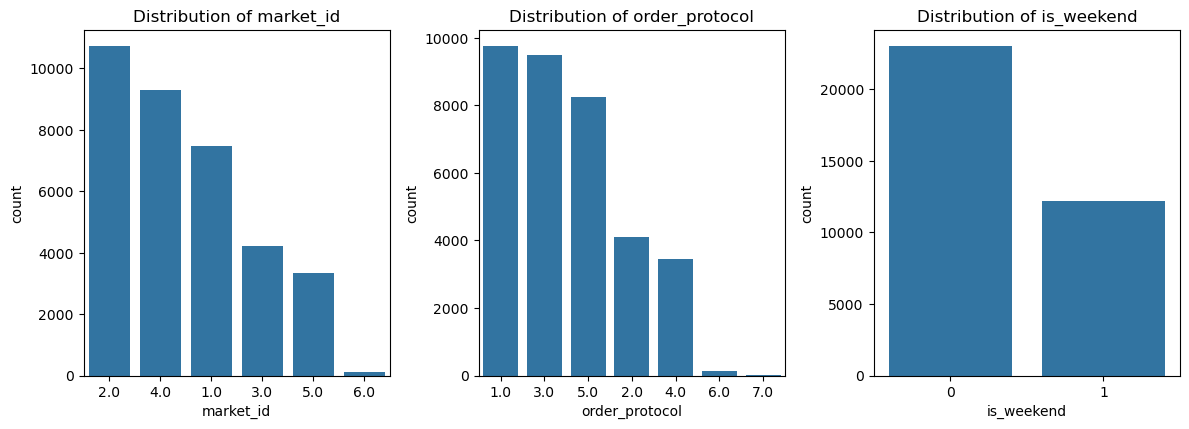

In [44]:
# Distribution of categorical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=X_test[col], order=X_test[col].value_counts().index,)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

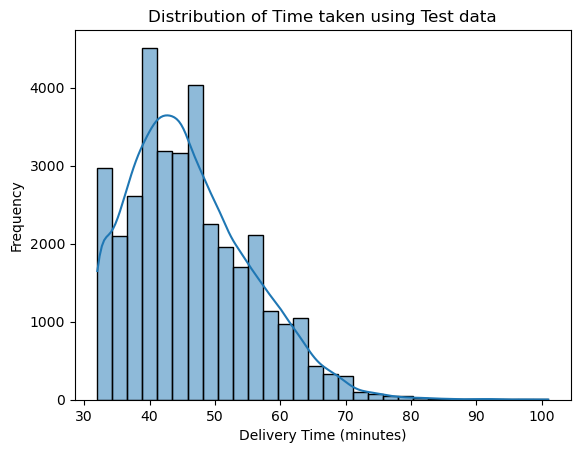

In [45]:
# Distribution of time_taken
sns.histplot(y_test, bins=30, kde=True)

plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Time taken using Test data")

plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

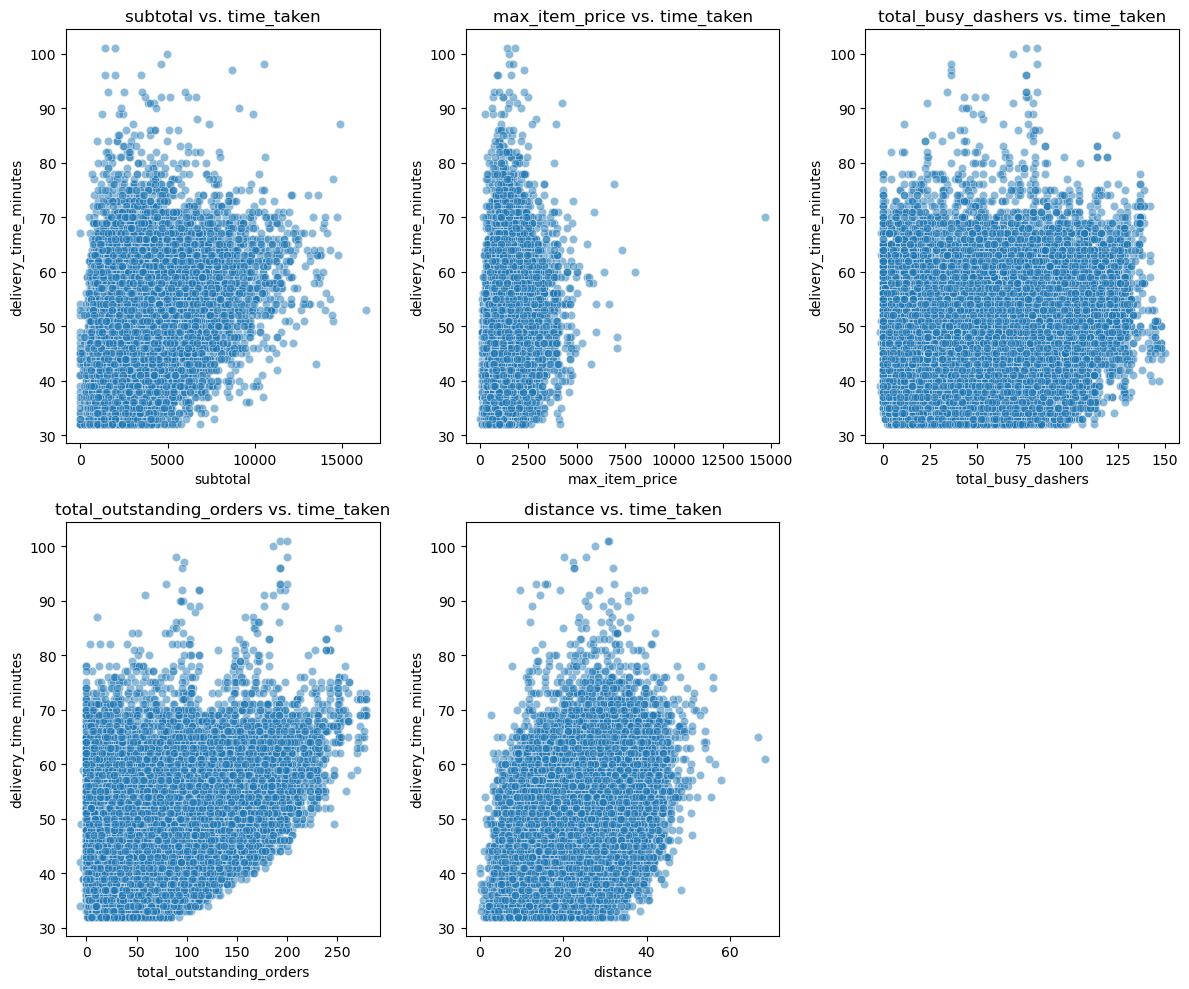

In [46]:
# Scatter plot to visualise the relationship between time_taken and other features
important_features = ['subtotal', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(important_features):
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{col} vs. time_taken')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [47]:
# Drop the weakly correlated columns from training dataset
X_test = X_test.drop(columns=weak_features)

In [48]:
# capping the X_test to maintain the cosistency with training data; 
numerical_columns = X_test.select_dtypes(include=['number']).columns
capping_columns = [col for col in numerical_columns if col != "num_distinct_items"]
X_test = capping_outliers(X_test, capping_columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140609, 12)
(35153, 12)
(140609,)
(35153,)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [49]:
# Import libraries
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [50]:
# Apply scaling to the numerical columns
# Use standard scaler as it ensures all features have mean = 0 and standard deviation = 1. This support better for Linear Regression
test_num_cols = X_train.select_dtypes(include=['number']).columns.tolist()

scaler = StandardScaler()

# keeping the original data (unscaled data) to compare later
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# scaling the data
X_train_scaled[test_num_cols] = scaler.fit_transform(X_train[test_num_cols])
X_test_scaled[test_num_cols] = scaler.transform(X_test[test_num_cols])

X_train_scaled.head()


,market_id,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,is_weekend
29429,4.0,2.0,0.559973,0.642631,0.199152,0.130916,1.492231,1.627877,1.864033,-0.131661,-0.861635,0
141821,1.0,5.0,-0.009127,0.377376,0.199152,-0.358700,-0.694441,-0.805047,-0.877504,-0.471083,-0.631094,0
32757,4.0,1.0,1.129072,2.473936,1.427499,0.786614,0.151072,0.005928,0.404510,-0.406868,-0.861635,0
46717,1.0,1.0,0.559973,1.367836,0.813326,1.004461,-1.160931,-1.148151,-0.995843,-0.975627,-0.746365,0
42092,3.0,2.0,1.698172,2.168174,-0.415021,-0.084774,0.034450,0.130693,-0.226635,-1.287528,-0.746365,0


In [51]:
X_train_scaled.describe().round(3)

,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour
count,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.147,-1.703,-1.029,-2.447,-1.423,-1.460,-1.252,-2.503,-0.977
25%,-0.578,-0.780,-1.029,-0.723,-0.811,-0.836,-0.799,-0.746,-0.746
50%,-0.009,-0.251,-0.415,-0.085,-0.228,-0.212,-0.325,-0.008,-0.631
75%,0.560,0.522,0.199,0.562,0.588,0.630,0.543,0.721,1.213
max,2.267,2.474,10.640,2.491,2.688,2.829,2.554,2.923,1.674


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

In [52]:
# label encoding for the categorical features
test_cat_cols = X_train.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

label_encoder = LabelEncoder()

for col in test_cat_cols:
    X_train_scaled[col] = label_encoder.fit_transform(X_train_scaled[col])
    X_test_scaled[col] = label_encoder.transform(X_test_scaled[col])

X_train_scaled.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,is_weekend
29429,3,1,0.559973,0.642631,0.199152,0.130916,1.492231,1.627877,1.864033,-0.131661,-0.861635,0
141821,0,4,-0.009127,0.377376,0.199152,-0.358700,-0.694441,-0.805047,-0.877504,-0.471083,-0.631094,0
32757,3,0,1.129072,2.473936,1.427499,0.786614,0.151072,0.005928,0.404510,-0.406868,-0.861635,0
46717,0,0,0.559973,1.367836,0.813326,1.004461,-1.160931,-1.148151,-0.995843,-0.975627,-0.746365,0
42092,2,1,1.698172,2.168174,-0.415021,-0.084774,0.034450,0.130693,-0.226635,-1.287528,-0.746365,0


In [53]:
X_train_scaled.describe().round(3)

,market_id,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,is_weekend
count,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000,140609.000
mean,1.746,1.913,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.346
std,1.332,1.513,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.476
min,0.000,0.000,-1.147,-1.703,-1.029,-2.447,-1.423,-1.460,-1.252,-2.503,-0.977,0.000
25%,1.000,0.000,-0.578,-0.780,-1.029,-0.723,-0.811,-0.836,-0.799,-0.746,-0.746,0.000
50%,1.000,2.000,-0.009,-0.251,-0.415,-0.085,-0.228,-0.212,-0.325,-0.008,-0.631,0.000
75%,3.000,3.000,0.560,0.522,0.199,0.562,0.588,0.630,0.543,0.721,1.213,1.000
max,5.000,6.000,2.267,2.474,10.640,2.491,2.688,2.829,2.554,2.923,1.674,1.000


In [54]:
X_train.dtypes

market_id                   category
order_protocol              category
total_items                    int64
subtotal                       int64
num_distinct_items             int64
max_item_price                 int64
total_onshift_dashers        float64
total_busy_dashers           float64
total_outstanding_orders     float64
distance                     float64
created_hour                   int32
is_weekend                  category
dtype: object

In [55]:
X_train.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,is_weekend
29429,4.0,2.0,4,3590,3,1195,96.0,94.0,152.0,20.68,1,0
141821,1.0,5.0,3,3184,3,968,21.0,16.0,13.0,17.72,3,0
32757,4.0,1.0,5,6393,5,1499,50.0,42.0,78.0,18.28,1,0
46717,1.0,1.0,4,4700,4,1600,5.0,5.0,7.0,13.32,2,0
42092,3.0,2.0,6,5925,2,1095,46.0,46.0,46.0,10.60,2,0


#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [56]:
# Create/Initialise the model
lr = LinearRegression()

In [57]:
# Train the model using the training data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
# Make predictions
y_pred = lr.predict(X_test_scaled)
y_pred[:10]

array([41.03050261, 53.28653302, 45.87134092, 45.32638664, 39.89369811,
       50.66911581, 51.86625462, 46.91006002, 41.08148574, 30.7006665 ])

In [59]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = mse ** 0.5  # Square root of MSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 2.46
Mean Squared Error (MSE): 11.59
Root Mean Squared Error (RMSE): 3.40
R² Score: 0.8665


In [60]:
X_train_scaled.columns

Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'created_hour', 'is_weekend'],
      dtype='object')

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [61]:
# Loop through the number of features and test the model
def compute_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialize variables
X_selected = X_train_scaled.copy()
num_features = len(X_selected.columns)
lr = LinearRegression()

while num_features > 8:   # Stop when we have the top 8 features
    # Perform RFE to rank features
    rfe = RFE(estimator=lr, n_features_to_select=num_features - 1)
    rfe.fit(X_selected, y_train)
    
    selected_features = X_selected.columns[rfe.support_]
    
    X_train_selected = X_selected[selected_features]
    X_test_selected = X_test_scaled[selected_features]
    
    # Train model
    lr.fit(X_train_selected, y_train)
    
    # Predictions
    y_pred = lr.predict(X_test_selected)
    
    # Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Compute VIF
    vif_scores = compute_vif(X_train_selected)

    # Identify feature to drop
    high_vif_features = vif_scores[vif_scores["VIF"] > 10].sort_values(by="VIF", ascending=False)
    
    if not high_vif_features.empty:
        drop_feature = high_vif_features.iloc[0]["Feature"]  # Drop the feature with highest VIF
        reason = f"High VIF ({high_vif_features.iloc[0]['VIF']:.2f})"
    # else:
    #     # If no high-VIF features, drop the least important feature according to RFE ranking
    #     drop_feature = X_selected.columns[~rfe.support_][0]  # Feature eliminated by RFE
    #     reason = "Removed by RFE"
    else:
        # If no high-VIF features, drop the least important feature based on R² contribution
        feature_contributions = abs(lr.coef_)
        drop_feature = X_train_selected.columns[np.argmin(feature_contributions)]
        reason = "Lowest contribution to R²"

    # Print results
    print(f"\nIteration {len(selected_features)} Features")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE Score: {rmse:.2f}")
    print("VIF Scores:")
    print(vif_scores.to_string(index=False))
    print(f"Dropping feature: {drop_feature} ({reason})")

    # Drop feature and update X_selected
    X_selected = X_selected.drop(columns=[drop_feature])
    num_features -= 1

# Final selected features
final_selected_features = list(X_selected.columns)
print("\nFinal 8 Selected Features:", final_selected_features)



Iteration 11 Features
R² Score: 0.8661
RMSE Score: 3.41
VIF Scores:
                 Feature       VIF
               market_id  1.747405
          order_protocol  1.748656
             total_items  4.581795
                subtotal  2.003884
      num_distinct_items  4.538488
   total_onshift_dashers 12.458629
      total_busy_dashers 11.477510
total_outstanding_orders 10.622670
                distance  1.004046
            created_hour  1.207939
              is_weekend  1.379524
Dropping feature: total_onshift_dashers (High VIF (12.46))

Iteration 10 Features
R² Score: 0.7107
RMSE Score: 5.01
VIF Scores:
                 Feature      VIF
               market_id 1.746092
          order_protocol 1.747837
             total_items 4.581795
                subtotal 2.003786
      num_distinct_items 4.538479
      total_busy_dashers 8.094457
total_outstanding_orders 8.190391
                distance 1.003868
            created_hour 1.196617
              is_weekend 1.374545
Dropping 

In [62]:
# Build the final model with selected number of features
X_train_final = X_train_scaled[final_selected_features]
X_test_final = X_test_scaled[final_selected_features]

# Initialize and train the final Linear Regression model
lr_1 = LinearRegression()
lr_1.fit(X_train_final, y_train)

# Make predictions
y_pred_final = lr_1.predict(X_test_final)

# Evaluate the final model
final_r2 = r2_score(y_test, y_pred_final)
final_rmse = mean_squared_error(y_test, y_pred_final, squared=False)

# Print final model performance
print(f"Final Model Performance:")
print(f"R² Score: {final_r2:.4f}")
print(f"RMSE Score: {final_rmse:.2f}")


Final Model Performance:
R² Score: 0.6956
RMSE Score: 5.14


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

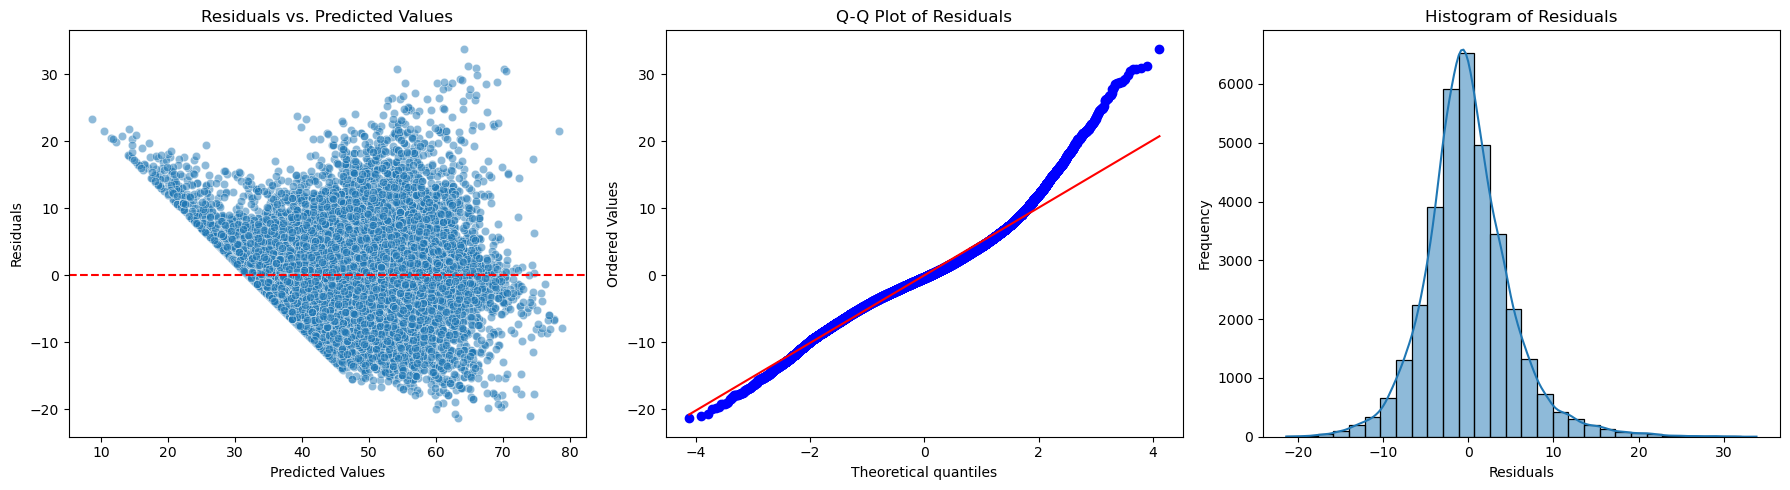

In [63]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_pred_final

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# residuals vs predicted values
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.5, ax=axes[0])
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs. Predicted Values")

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

# residual histogram
sns.histplot(residuals, bins=30, kde=True, ax=axes[2])
axes[2].set_xlabel("Residuals")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Histogram of Residuals")

plt.tight_layout()
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [64]:
# Compare the scaled vs unscaled features used in the final model
# coefficients on scaled data
coef_scaled = lr_1.coef_

# train a new model on unscaled data
lr_2 = LinearRegression()
lr_2.fit(X_train[final_selected_features], y_train)
coef_unscaled = lr_2.coef_

coef_comparison = pd.DataFrame({
                                "Feature": final_selected_features,
                                "Coefficient (Scaled)": coef_scaled,
                                "Coefficient (Unscaled)": coef_unscaled
                            })

# Sort by absolute impact
coef_comparison = coef_comparison.sort_values(by="Coefficient (Unscaled)", ascending=False)

# Display coefficients
print("\nScaled vs. Unscaled Coefficients:")
print(coef_comparison)



Scaled vs. Unscaled Coefficients:
                    Feature  Coefficient (Scaled)  Coefficient (Unscaled)
7                is_weekend              1.929578                1.929578
5                  distance              4.081253                0.467994
4  total_outstanding_orders             12.837319                0.253194
1                  subtotal              2.930545                0.001915
2            max_item_price             -0.073089               -0.000158
6              created_hour             -1.705933               -0.196644
3        total_busy_dashers            -11.204927               -0.349497
0            order_protocol             -0.761149               -0.761149


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

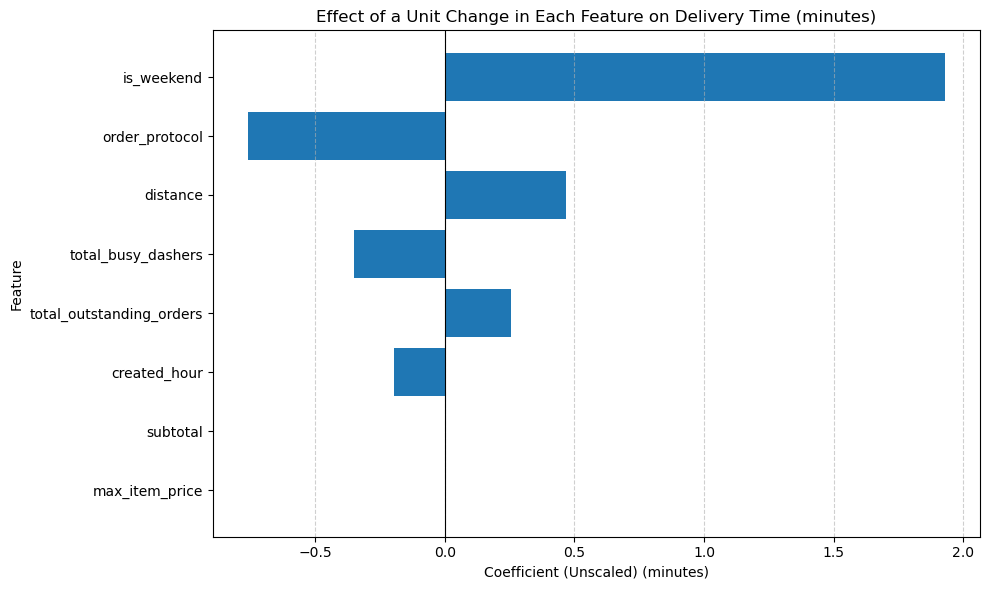

In [65]:
# Analyze the effect of a unit change in a feature, say 'total_items'
coef_comparison["abs_coef"] = coef_comparison["Coefficient (Unscaled)"].abs()
df_sorted = coef_comparison.sort_values("abs_coef", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["Feature"], df_sorted["Coefficient (Unscaled)"])
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Effect of a Unit Change in Each Feature on Delivery Time (minutes)")
plt.xlabel("Coefficient (Unscaled) (minutes)")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**  

Yes, the dataset had 6 numerical categorical variables. market_id, store_primary_category, order_protocol, order_day, order_hour, isWeekend. To train the model I have used isweekend and order hour. Orders placed on weekends increase delivery time by ~1.92 minutes. For every 1-hour increase, delivery time decreases by ~0.20 minutes . This could be because of lower traffic at night, making deliveries faster.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**

Yes, 20% of the dataset is assigned to the test set. This will help us to evaluate model performance on unseen data



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**

distance has the highest positive correlation (0.47) and order hour has the highest negative correlation This make sence as Longer distances lead to longer delivery times and Later in the day (especially at night), delivery times tend to be shorter.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
**Approach to detect the outliers** - 
> I have used boxplots to visualize the data distribution and identifying extreme values.
> Calculate the IQR, lower bound and upper bound. Any value outside these bounds is an outlier

</br>**Handle outliers** - 
> Capping for Most Features using lower bound and upper bounds. Havn't capped 'num_distinct_items' as represents unique item counts in an order, so high values are valid
>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

> - isWeekend (+1.9295) - Weekends increase delivery time significantly.
> - distance (+0.4679) - Longer distances increase delivery time.
> - total_outstanding_orders (+0.2531) - More pending orders increase delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.
> Linear regression assumes a linear relationship between the input variables (X) and a single output variable (y).
Equation - y= B0 + BiXi + e; y - dependent variable, Xi - independent variable, B0 - intercept, Bi - slope, e - represent error terms.
>
> There are two types of linear regression - 1) Simple linear regression - involve single independent variable 2) Multiple linear regression - involves multiple independent variable.
>
> **Assumptions**
> 1. Linearity: The relationship between independent and dependent variables should be linear
> 2. Independence: Each observation should be independent of other observations
> 3. Homoscedasticity: The variance of residuals should be constant across all levels of independent variables




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

Simple linear regression Uses a single independent variable to predict a dependent variable. Usually represents a straight line relationship. Advantage - less complex can be visualize easily on a 2D diagram. Disadvantage - limited predictive power

Eq - y = A0 + A1X + e

Multiple linear regression Uses two or more independent variables to predict a dependent variable. Wokrs very well with complex, multi-factor relationships. Advantage - help us on more accurate predictions. Disadvantage - Multicollinearity can cause instability in the regression coefficients, making it difficult to interpret the results of the analysis.

Eq - y = A0 + A1X1 + A2X2 + ...... + e



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**

The cost function in linear regression plays a central role in guiding the learning process. Here's a breakdown of its role and how it's minimized:

In linear regression, the goal is to find the best-fitting line through the data points. The cost function quantifies how well (or poorly) a particular line fits the data. Specifically, it measures the error between the predicted values and the actual values. Techniques like gradient descent are used to find the values of the parameters that result in the lowest possible cost, meaning the best fit to the data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

Underfitting happens when a model is too simple to capture the underlying patterns in the data. Symptoms: Poor performance on training data Even worse performance on validation/test data

Overfitting happens when a model is too complex and starts to "memorize" the training data, including noise. Symptoms: Very good performance on training data Poor performance on validation/test data A high-degree polynomial model that fits every training point exactly, but fails to predict new data accurately.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are a powerful diagnostic tool in linear regression. They help you understand how well your model fits the data by visualizing the errors (residuals)—the differences between actual and predicted values.

1.**Detecting Non-Linearity**
 Good Sign: Residuals are randomly scattered around zero.
Problem: Curved pattern in the residuals suggests that the relationship is nonlinear, and a linear model is a poor fit.

2. **Identifying Heteroscedasticity** (Non-constant Variance)
 Good Sign: Spread of residuals is roughly constant across all levels of 𝑥. Problem: "Funnel" shape (narrow then wide or vice versa) indicates heteroscedasticity, which violates linear regression assumptions.

3. **Spotting Outliers and Influential Points**
Large residuals far from the rest may indicate outliers or leverage points that could distort the model.

4. **Checking for Independence** (Autocorrelation)
If residuals show a clear pattern (like a wave), they may be autocorrelated, especially in time series data.


